In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import random

In [ ]:
#GridConstants-------------------------------------------
t=[]
r=[]
dr_dt=[]
h=0.02275
r0=0.0005
#WavefunctionDefiningConstants---------------------------
N=1
l=0
assert l<=N-1
Z = 11
E= -10
assert E<0
#PotentialConstants--------------------------------------
a_=0.2683
b_=0.4072
num_e=1
L=Z-num_e+1
#AdamsConstants------------------------------------------
k=3
#OutwardConstants----------------------------------------
#InwardConstants-----------------------------------------
InwardTerms=10
#Array constants-----------------------------------------
a=[[1,1],[-1,8,5],[1,-5,19,9],[-19,106,-264,646,251],[27,-173,482,-798,1427,475]]
D=[2,12,24,720,1440]
c_=[[1],[9,28,23],[475,1902,1104,1586,1413],[36799,176648,54851,177984,89437,119585]]
d_=[2,24,1440,120960]
m=[[-11,18,-9,2],[-2,-3,6,-1],[1,-6,3,2],[-2,9,-18,11]]
#Energy scaling factors----------------------------------
scale_down=1.1
scale_up=0.9
#Initializing mij for outward integration----------------
for i in range(4):
  for j in range(4):
    m[i][j]/=6*h
mij=[[] for s in range(2*k)]
for i in range(2*k):
  for j in range(2*k):
    mij[i].append(0)

In [ ]:
#grid points
for i in range (1000):
  t.append((i+1)*h) 
  r.append(r0*(math.exp(t[i])-1))
  dr_dt.append(r0*(math.exp(t[i])))

In [ ]:
#ACTUAL WAVEFUNCTIONS
r = np.array(r)
R=np.zeros(500)
Qe=np.zeros(500)
p=2*2*np.array(r)/4
orbital={
    0 : 's',
    1 : 'p',
    2 : 'd',
    3 : 'f'
}
orbitall={
    's' : 0,
    'p' : 1,
    'd' : 2,
    'f': 3
}
wavefunctions={
    '1sP' : (2*((Z)**(3/2))*r*np.exp(-Z*r)),
    '1sQ' : (-2*((Z)**(3/2))*np.exp(-Z*r)*(Z*r-1)),
    '2sP' : (1/np.sqrt(2))*(Z**(3/2))*r*np.exp(-Z*r/2)*(1-Z*r/2),
    '2sQ' : ((1/2**(5/2))*(Z**(3/2))*np.exp(-Z*r/2)*((Z*Z*r*r)-(6*Z*r)+4)),
    '2pP' : ((1/2*sqrt(6))*((Z)**(5/2))*(r**2)*np.exp(-Z*r/2)),
    '2pQ' : ((-1/4*sqrt(6))*((Z)**(5/2))*r*np.exp(-Z*r/2)*(Z*r-4)),
    '3sP' : ((2/3*sqrt(3))*(Z**(3/2))*r*np.exp(-Z*r/3)*(1-(2/3*Z*r)+(2/27*(Z**2)*(r**2)))),
    '3sQ' : ((-2/3**(11/2))*(Z**(3/2))*np.exp(-Z*r/3)*((2*(Z**3)*(r**3))-(36*(Z**2)*(r**2))+135*Z*r-81)),
    '3pP' : ((8/27*sqrt(6))*((Z)**(5/2))*(r**2)*np.exp(-Z*r/3)*(1-Z*r/6)),
    '3pQ' : ((8/81*(6**(3/2)))*((Z)**(5/2))*r*np.exp(-Z*r/3)*((Z*Z*r*r)-15*Z*r+36)),
    '3dP' : ((4/81*sqrt(30))*((Z)**(7/2))*(r**3)*np.exp(-Z*r/3)),
    '3dQ' : ((-4/243*sqrt(30))*((Z)**(7/2))*(r**2)*(np.exp(-Z*r/3))*(Z*r-9)),
    '4pP' : (1/(32*np.sqrt(15))*p*(20-10*p+p**2)*(2**(3/2))*(np.exp(-p/2)))*r,
    '4pQ' : (1/(32*np.sqrt(15))*(2**(3/2))*-0.5*(np.exp(-p/2)*p*(-80+(80*p)+(-18*p*p)+(p**3))))
}

In [ ]:
def Empty(p,q,P,Q,y,f,V,ak,bk,P_1,Q_1,y_,f_):
  p.clear()
  q.clear()
  P.clear()
  Q.clear()
  y.clear()
  f.clear()
  V.clear()
  ak.clear()
  bk.clear()
  P_1.clear()
  Q_1.clear()
  y_.clear()
  f_.clear()
  return None

In [ ]:
def CoeffGenerator(E,V,n,l,Z,b,c,c1,d,io):
  V.clear()
  for i in range (500):
    if(io=="O"):
      # V.append(-Z/r[i])
      V.append((-Z/r[i])+(Z-L)*r[i]/(r[i]**2+a_**2))
      # V.append((-Z/r[i])+((Z-L)*(1-np.exp(-r[i]/b_))/r[i]))
    elif(io=="I"):
      V.append(-L/r[i])
    c.append(b[i]*-2*(E-V[i]-(((l)*(l+1))/(2*(r[i]**2)))))
    c1.append(b[i]*-2*(E-V[i]))
    d.append(-2*b[i]*(l+1)/r[i])

In [ ]:
def Equation(a,b,c):
    e = b ** 2 - 4 * a * c
    final=[]
    if e > 0:
        x1 = (((-b) + sqrt(e)) / (2 * a))
        x2 = (((-b) - sqrt(e)) / (2 * a))
        final.append(x1)
        final.append(x2)
    elif e == 0:
        x = (-b) / 2 * a
        final.append(x)
    else:
        final.append(463)
    return final

In [ ]:
def Adam(f,y,n,l,k,E,Z,a,io):
  s=io
  b=dr_dt.copy()
  c1=[]
  c=[]
  d=[]
  V=[]
  CoeffGenerator(E,V,500,l,Z,b,c,c1,d,s)
  y_n=[0,0]
  for i in range (1,k+1):
      y_n[0]+=(a[k-1][i-1]*f[n-k+i][0])
      y_n[1]+=(a[k-1][i-1]*f[n-k+i][1])
  if(io=="O"):
    for j in range(2):
      y_n[j]*=(+h/(D[k-1]))
    y_n[0]+=y[-1][0]
    y_n[1]+=y[-1][1]
    lamda=(h/D[k-1])*a[k-1][k]
    M_inv=[[1,lamda*b[n+1]],[lamda*c[n+1],1]]
    for i in range(2):
      for j in range(2):
        M_inv[i][j]*=(1/(1-((lamda**2)*b[n+1]*c[n+1])))
    y_n=np.matmul(M_inv,y_n)
    y.append(y_n)
    f.append([b[n+1]*y_n[1],((c1[n+1]+(b[n+1]*((l*(l+1))/(r[n+1]**2))))*y_n[0])])
  elif(io=="I"):
    for j in range(2):
      y_n[j]*=(-h/(D[k-1]))
    y_n[0]+=y[-1][0]
    y_n[1]+=y[-1][1]
    lamda=(-h/D[k-1])*a[k-1][k]
    M_inv=[[1,lamda*b[499-n-1]],[lamda*c[499-n-1],1]]
    for i in range(2):
      for j in range(2):
        M_inv[i][j]*=(1/(1-((lamda**2)*b[499-n-1]*c[499-n-1])))
    y_n=np.matmul(M_inv,y_n)
    y.append(y_n)
    f.append([b[499-n-1]*y_n[1],c[499-n-1]*y_n[0]])

In [ ]:
def scaling_factor(y,y_):
    ctp=CTPnew(E,l,Z)
    slope =(y[-1][0]-y[-2][0])/(r[ctp]-r[ctp-1])
    y_target=y[-1][0] + slope*(r[ctp+1]-r[ctp])
    factor = y_target/y_[-1][0]
    return factor

In [ ]:
def OutwardIntegration(f,y,p,q,P,Q,n,k,l,Z,E,m,mij,io="O"):#here n in number of grid points
    b=dr_dt.copy()
    V=[] 
    c=[]
    c1=[]
    d=[]
    CoeffGenerator(E,V,n,l,Z,b,c,c1,d,"O")
    p.append(1)
    q.append(-Z/(l+1))
    #adding elements which are corresponding to p's on the rhs
    for i in range (k):
      for j in range (2*k):
        if(j%2==0):
          mij[2*i][j]=m[i+1][int(j/2)+1]
        else:
          mij[2*i][j]=0
        
    #adding elements which are corresponding to q's on the rhs
    for i in range (k):
      for j in range (2*k):
        if(j%2!=0):
          mij[2*i+1][j]=m[i+1][int(j/2)+1]
        else:
          mij[2*i+1][j]=0
      
    #adding terms associated with b[i],c1[i],d[i]
    for i in range(2*k):
      if(i%2==0):
        
        mij[i][i+1]-=b[int(i/2) + 1]
      if(i%2!=0):
        mij[i][i-1]-=c1[int(i/2) + 1]
        mij[i][i]-=d[int(i/2) + 1]
    rhs=[]
    for i in range(k):
      rhs.append(-m[i+1][0]*p[0])
      rhs.append(-m[i+1][0]*q[0])
    soln=[0 for t in range(2*k)]
    mij_inv=np.linalg.inv(mij)  
    soln=np.dot(mij_inv,rhs)
    for i in range(2*k):
      if(i%2==0):
        p.append(soln[i])
      else:
        q.append(soln[i])
    for i in range(k+1):
      P.append((r[i]**(l+1))*p[i])
      Q.append((r[i]**(l+1))*(q[i]+(l+1)*(p[i]/r[i])))
    for i in range(k+1):
      y.append([P[i],Q[i]])
    for i in range(k+1):
      f.append([b[i]*Q[i],(c1[i]+b[i]*((l*(l+1))/(r[i]**2)))*P[i]])
    x=k
    while(x<CTPnew(E,l,Z)):
      Adam(f,y,x,l,k,E,Z,a,"O")
      x+=1
    return [y,f]

In [ ]:
def InwardIntegration(f_,y_,P_1,Q_1,n,k,l,Z,E,L,ak,bk,io="I"):
  P_1.clear()
  Q_1.clear()
  ak.clear()
  bk.clear()
  b=dr_dt.copy()
  V=[]
  c=[]
  c1=[]
  d=[]
  CoeffGenerator(E,V,n,l,Z,b,c,c1,d,"I") 
  lamda_1=math.sqrt(-2*E)
  sigma=L/lamda_1
  ak.append(1)
  bk.append(-lamda_1)
  for i in range(1,InwardTerms):
    ak.append((((l*(l+1))-(sigma-i)*(sigma-i+1))/(2*i*lamda_1))*ak[i-1])
    bk.append(((-1*(l*(l+1))+(sigma+i)*(sigma-i+1))/(2*i))*ak[i-1])
  for i in range (k+1):
    temp1=0
    temp2=0
    for j in range(InwardTerms):
      temp1+=ak[j]/(r[499-i]**j)
      temp2+=bk[j]/(r[499-i]**j)
    P_1.append((r[499-i]**sigma)*(math.e**(-lamda_1*r[499-i]))*temp1)
    Q_1.append((r[499-i]**sigma)*(math.e**(-lamda_1*r[499-i]))*temp2)
  for i in range(k+1):
    y_.append([P_1[i],Q_1[i]])
  for i in range(k+1):
    f_.append([b[499-i]*Q_1[i],c[499-i]*P_1[i]])
  x=k
  while (x<499-CTPnew(E,l,Z)-1):
    Adam(f_,y_,x,l,k,E,Z,a,"I")
    x+=1
  return [y_,f_]

In [ ]:
def NormalizationConstant(f,k,c,d,m1,h):#here the k value is different from the one used in OutwardIntegration , and this can take only odd values
  sum = 0
  for j in range(k):
    sum+=(c_[int((k-1)/2)][j]/d_[int((k-1)/2)])*h*(f[j]+f[m1-j])
  w=k
  while(w<=m1-k):
    sum+=f[w]
    w+=1
  return sum

In [ ]:
def CTPnew(ECTP,l,Z):
    ang_mom=math.sqrt((l+1)*l)
    list=Equation(2*ECTP,2*Z,-1*ang_mom*ang_mom)
    u=list[0]
    for i in list:
      if i>u:
        u=i
    min=0
    for i in range(500) :
      if(abs(u-r[i])<=abs(u-r[min])):
        min=i
    if min>=499:
      min=498
    return min

In [ ]:
def mmcounter(start,stop,f):
  count=0
  info=[[]]
  for i in range(start,stop):
    if(i!=start & i!=stop):
      if (f[i-1][0]>f[i][0] and f[i+1][0]>f[i][0]) or (f[i-1][0]<f[i][0] and f[i+1][0]<f[i][0]):
        count+=1
        info[0].append(i)
  return info

In [ ]:
def Combinesoln(y,y_,V,E,j):
  combined=[]
  t=-1
  for i in range(0,CTPnew(E,l,Z)+1):
    combined.append(y[i][j])
  for i in range(CTPnew(E,l,Z)+1,500):
    combined.append(y_[t][j])
    t=t-1
  return combined

In [ ]:
def NodeCounter(ECTP,l,Z,f):
  n=CTPnew(ECTP,l,Z)
  count=0
  for i in range(n):
    if(i!=0  and i!=n-1):
      if((f[i-1]>0 and f[i]<=0 )or(f[i] >=0 and f[i-1]<0)):
        count+=1
  return count

In [ ]:
def NodeCorrection(f,y,n,N,l,k,E,V,Z,a,p,q,P,Q,m,mij,f_,y_,P_1,Q_1,ak,bk):#here N refers to the principal quantum number
  OutwardIntegration(f,y,p,q,P,Q,n,k,l,Z,E,m,mij)
  InwardIntegration(f_,y_,P_1,Q_1,n,k,l,Z,E,L,ak,bk)
  scale_factor = scaling_factor(y,y_)
  y_ = list(scale_factor * np.array(y_))
  f_ = list(scale_factor * np.array(f_))
  y_final=Combinesoln(y,y_,V,E,0) 
  f_final=Combinesoln(y,y_,V,E,1) 
  end = 400
  plt.plot(r[0:end],y_final[0:end])
  plt.title('P before Node correction starts')
  plt.show()
  plt.plot(r[0:end],f_final[0:end])
  plt.title('Q before Node correction starts')
  plt.show()
  iter=0
  print("Number of nodes initially is : ",NodeCounter(E,l,Z,y_final))
  while(NodeCounter(E,l,Z,y_final)!=N-l-1):
    txt="iter number :{:<4}|Energy is : {:.5f}|Nodes: {}"
    print(txt.format(iter,E,NodeCounter(E,l,Z,y_final)))
    iter+=1
    if(NodeCounter(E,l,Z,y_final)>N-l-1):
      E*=scale_down
    else:
      E*=scale_up
    Empty(p,q,P,Q,y,f,V,ak,bk,P_1,Q_1,y_,f_)
    y_final.clear()
    f_final.clear()
    OutwardIntegration(f,y,p,q,P,Q,n,k,l,Z,E,m,mij)
    InwardIntegration(f_,y_,P_1,Q_1,n,k,l,Z,E,L,ak,bk)
    scale_factor = scaling_factor(y,y_)
    y_ = list(scale_factor * np.array(y_))
    f_ = list(scale_factor * np.array(f_))
    y_final=Combinesoln(y,y_,V,E,0)
    f_final=Combinesoln(y,y_,V,E,1)
  return [y,y_,f,f_,E]

In [ ]:
def DerivativeCorrection(f,y,n,N,l,k,E,V,L,Z,a,p,q,P,Q,m,mij,f_,y_,P_1,Q_1,ak,bk):
  Eu=E
  El=E
  Ed=E
  y_final=Combinesoln(y,y_,V,E,0)
  f_final=Combinesoln(y,y_,V,E,1)
  fd=f.copy()
  yd=y.copy()
  pd=p.copy()
  qd=q.copy()
  Pd=P.copy()
  Qd=Q.copy()
  f_d=f_.copy()
  y_d=y_.copy()
  P_1d=P_1.copy()
  Q_1d=Q_1.copy()
  akd=ak.copy()
  bkd=bk.copy()
  y_final1=Combinesoln(yd,y_d,V,Eu,0)
  Etemp=Eu
  while(NodeCounter(Eu,l,Z,y_final1)<=N-l-1):
    Empty(pd,qd,Pd,Qd,yd,fd,V,akd,bkd,P_1d,Q_1d,y_d,f_d)
    y_final1.clear()
    Etemp=Eu
    Eu*=scale_up
    OutwardIntegration(fd,yd,pd,qd,Pd,Qd,n,k,l,Z,Eu,m,mij)
    InwardIntegration(f_d,y_d,P_1d,Q_1d,n,k,l,Z,Eu,L,akd,bkd)
    scale_factor = scaling_factor(yd,y_d)
    y_d = list(scale_factor * np.array(y_d))
    f_d = list(scale_factor * np.array(f_d))
    y_final1=Combinesoln(yd,y_d,V,Eu,0)
  lmfao=[Etemp,Eu]
  node=[]
  for i in range(2):
    Empty(pd,qd,Pd,Qd,yd,fd,V,akd,bkd,P_1d,Q_1d,y_d,f_d)
    y_final1.clear()
    OutwardIntegration(fd,yd,pd,qd,Pd,Qd,n,k,l,Z,lmfao[i],m,mij)
    InwardIntegration(f_d,y_d,P_1d,Q_1d,n,k,l,Z,lmfao[i],L,akd,bkd)
    scale_factor = scaling_factor(yd,y_d)
    y_d = list(scale_factor * np.array(y_d))
    f_d = list(scale_factor * np.array(f_d))
    y_final1=Combinesoln(yd,y_d,V,lmfao[i],0)
    node.append(NodeCounter(lmfao[i],l,Z,y_final1))
  if (node[0]<node[1]):
    Eu=Etemp
  fd=f.copy()
  yd=y.copy()
  pd=p.copy()
  qd=q.copy()
  Pd=P.copy()
  Qd=Q.copy()
  f_d=f_.copy()
  y_d=y_.copy()
  P_1d=P_1.copy()
  Q_1d=Q_1.copy()
  akd=ak.copy()
  bkd=bk.copy()
  y_final2=Combinesoln(yd,y_d,V,El,0)
  txt="Upper limit for energy is : {}".format(Eu)
  print(txt)
  Etemp1=El
  if(NodeCounter(El,l,Z,y_final2)==0):
    El=-1000
  else:
    while(NodeCounter(El,l,Z,y_final2)>=N-l-1):
      Empty(pd,qd,Pd,Qd,yd,fd,V,akd,bkd,P_1d,Q_1d,y_d,f_d)
      y_final2.clear()
      Etemp1=El
      El*=scale_down
      OutwardIntegration(fd,yd,pd,qd,Pd,Qd,n,k,l,Z,El,m,mij)
      InwardIntegration(f_d,y_d,P_1d,Q_1d,n,k,l,Z,El,L,akd,bkd)
      scale_factor = scaling_factor(yd,y_d)
      y_d = list(scale_factor * np.array(y_d))
      f_d = list(scale_factor * np.array(f_d))
      y_final2=Combinesoln(yd,y_d,V,El,0)
    lmfao1=[Etemp1,El]
    node1=[]
    for i in range(2):
      Empty(pd,qd,Pd,Qd,yd,fd,V,akd,bkd,P_1d,Q_1d,y_d,f_d)
      y_final2.clear()
      OutwardIntegration(fd,yd,pd,qd,Pd,Qd,n,k,l,Z,lmfao1[i],m,mij)
      InwardIntegration(f_d,y_d,P_1d,Q_1d,n,k,l,Z,lmfao1[i],L,akd,bkd)
      scale_factor = scaling_factor(yd,y_d)
      y_d = list(scale_factor * np.array(y_d))
      f_d = list(scale_factor * np.array(f_d))
      y_final2=Combinesoln(yd,y_d,V,lmfao1[i],0)
      node1.append(NodeCounter(lmfao1[i],l,Z,y_final2))
    if(node1[0]>node1[1]):
      El=Etemp1
  txt="Lower limit for energy is : {}".format(El)
  print(txt)
  q1_minus=f_final[CTPnew(E,l,Z)]
  q1_plus=f_final[CTPnew(E,l,Z)+1]
  iter=1
  maxf=max(f_final)
  minf=min(f_final)
  percent=0.1
  target=percent*abs(maxf-minf)/100
  txt="Target Discontinuity is : {:.5f}"
  print(txt.format(target))
  # for i in range(10):
  while(abs(q1_minus-q1_plus)>=target and iter<=500 :
      txt="iter number :{:<4}|Discontinuity is  : {:.5f}|Energy is : {:.5f}"
      print(txt.format(iter,abs(q1_minus-q1_plus),E))
      iter+=1
      Empty(p,q,P,Q,y,f,V,ak,bk,P_1,Q_1,y_,f_)
      a_c= CTPnew(E,l,Z)
      q1_minus=f_final[a_c]
      q1_plus=f_final[a_c+1]
      p1=y_final[a_c]
      P1_squared=[]
      for i in range(500):
        P1_squared.append(y_final[i]**2)
      Integral=NormalizationConstant(P1_squared,3,c_,d_,499,h)
      E2=Ed+((q1_minus-q1_plus))*p1/(2*Integral)
      if(E2>Eu or E2<El):
        if(E2>Eu):
          E=(Ed+Eu)/2
          OutwardIntegration(f,y,p,q,P,Q,n,k,l,Z,E,m,mij)
          InwardIntegration(f_,y_,P_1,Q_1,n,k,l,Z,E,L,ak,bk)
          scale_factor = scaling_factor(y,y_)
          y_ = list(scale_factor * np.array(y_))
          f_ = list(scale_factor * np.array(f_))
          y_final=Combinesoln(y,y_,V,E,0)
          f_final=Combinesoln(y,y_,V,E,1)
          break
        else:
          E=(Ed+El)/2
          OutwardIntegration(f,y,p,q,P,Q,n,k,l,Z,E,m,mij)
          InwardIntegration(f_,y_,P_1,Q_1,n,k,l,Z,E,L,ak,bk)
          scale_factor = scaling_factor(y,y_)
          y_ = list(scale_factor * np.array(y_))
          f_ = list(scale_factor * np.array(f_))
          y_final=Combinesoln(y,y_,V,E,0)
          f_final=Combinesoln(y,np.array(y_),V,E,1)
          break
      else:
        Ed=E2
        E=E2
        OutwardIntegration(f,y,p,q,P,Q,n,k,l,Z,E,m,mij)
        InwardIntegration(f_,y_,P_1,Q_1,n,k,l,Z,E,L,ak,bk)
        scale_factor = scaling_factor(y,y_)
        y_ = list(scale_factor * np.array(y_))
        f_ = list(scale_factor * np.array(f_))
        y_final=Combinesoln(y,y_,V,E,0)
        f_final=Combinesoln(y,np.array(y_),V,E,1)
  print("Final energy is : ",E)
  return [y_final,f_final,E]

In [ ]:
#Outward Integration lists-----------------------------
p=[]
q=[]
P=[]
Q=[]
y=[]
f=[]
V=[]
#------------------------------------------------------
#Inward Integration lists------------------------------
ak=[]
bk=[]
P_1=[]
Q_1=[]
y_=[]
f_=[]
#------------------------------------------------------

In [ ]:
#Plotting Range
start=0
stop=400
assert stop<=500

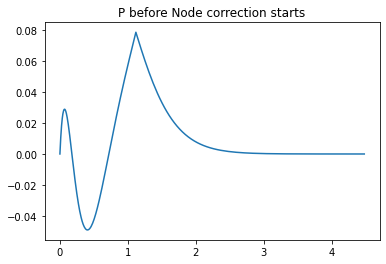

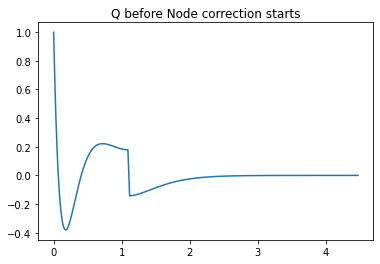

Number of nodes initially is :  2
iter number :0   |Energy is : -10.00000|Nodes: 2
iter number :1   |Energy is : -11.00000|Nodes: 2
iter number :2   |Energy is : -12.10000|Nodes: 2
iter number :3   |Energy is : -13.31000|Nodes: 1
iter number :4   |Energy is : -14.64100|Nodes: 1
iter number :5   |Energy is : -16.10510|Nodes: 1
iter number :6   |Energy is : -17.71561|Nodes: 1
iter number :7   |Energy is : -19.48717|Nodes: 1
iter number :8   |Energy is : -21.43589|Nodes: 1
iter number :9   |Energy is : -23.57948|Nodes: 1
iter number :10  |Energy is : -25.93742|Nodes: 1
iter number :11  |Energy is : -28.53117|Nodes: 1
iter number :12  |Energy is : -31.38428|Nodes: 1
iter number :13  |Energy is : -34.52271|Nodes: 1
iter number :14  |Energy is : -37.97498|Nodes: 1
iter number :15  |Energy is : -41.77248|Nodes: 1


In [ ]:
#Node Correction Computation
Values=NodeCorrection(f,y,500,N,l,k,E,V,Z,a,p,q,P,Q,m,mij,f_,y_,P_1,Q_1,ak,bk)
y=Values[0].copy()
y_=Values[1].copy()
f=Values[2].copy()
f_=Values[3].copy()
E=Values[4]
ync=Combinesoln(y,y_,V,E,0)
fnc=Combinesoln(y,y_,V,E,1)

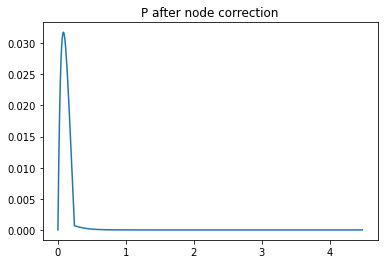

In [ ]:
plt.plot(r[start:stop],ync[start:stop])
plt.title('P after node correction')
plt.show()

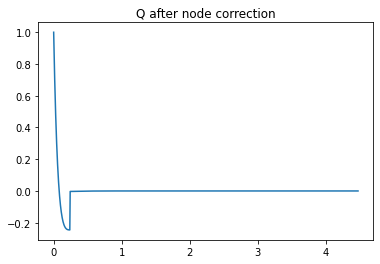

In [ ]:
plt.plot(r[start:stop],fnc[start:stop])
plt.title('Q after node correction')
plt.show()

In [ ]:
#Derivative Correction Computation
Values1=DerivativeCorrection(f,y,500,N,l,k,E,V,L,Z,a,p,q,P,Q,m,mij,f_,y_,P_1,Q_1,ak,bk)
fdc=Values1[1].copy()
ydc=Values1[0].copy()
E=Values1[2]
#Normalizing the Final Wavefunction---------------------
Norma=NormalizationConstant(ydc,3,c_,d_,499,h)
for i in range(500):
  ydc[i]/=Norma
  fdc[i]/=Norma

Upper limit for energy is : -45.949729863572216
Lower limit for energy is : -1000
Target Discontinuity is : 0.00125
Final energy is :  -45.949729863572216


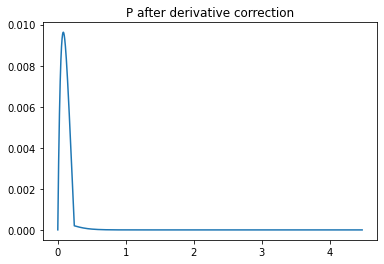

In [ ]:
plt.plot(r[start:stop],ydc[start:stop])
plt.title('P after derivative correction')
plt.show()

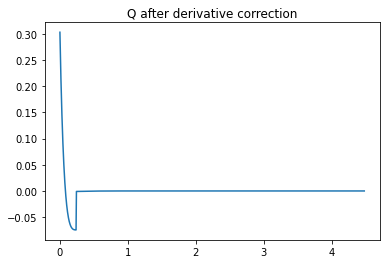

In [ ]:
plt.plot(r[start:stop],fdc[start:stop])
plt.title('Q after derivative correction')
plt.show()

In [ ]:
#Percentage error in energy values predicted for couloumb potential
E_actual=-(Z**2)/(2*N**2)
error_percentage=abs(((E-E_actual)*100/E_actual))
align=80
print("Actual energy with coulumb potential is :{}".format(E_actual))
print("Predicted energy :{}".format(E))
print("Perecentage error obtained in energy prediction is :{}".format(error_percentage))

Actual energy with coulumb potential is :-60.5
Predicted energy :-45.949729863572216
Perecentage error obtained in energy prediction is :24.05003328335171


In [ ]:
#Check if the function is normalized
Norma=NormalizationConstant(ydc,3,c_,d_,499,h)
if(Norma>=0.99 and Norma<=1.1):
  print("Function is normalised")
else:
  print("Function is not normalised")
print("Current Normalising factor is : ",Norma)

Function is normalised
Current Normalising factor is :  1.0000000000000007


In [ ]:
# def MasterSolution(f,y,n,N,l,k,E,V,L,Z,a,p,q,P,Q,m,mij,f_,y_,P_1,Q_1,ak,bk):
#   Empty(p,q,P,Q,y,f,V,ak,bk,P_1,Q_1,y_,f_)
#   Values=NodeCorrection(f,y,500,N,l,k,E,V,Z,a,p,q,P,Q,m,mij,f_,y_,P_1,Q_1,ak,bk)
#   y=Values[0].copy()
#   y_=Values[1].copy()
#   f=Values[2].copy()
#   f_=Values[3].copy()
#   E=Values[4]
#   ync=Combinesoln(y,y_,V,E,0)
#   fnc=Combinesoln(y,y_,V,E,1)
#   Values1=DerivativeCorrection(f,y,500,N,l,k,E,V,L,Z,a,p,q,P,Q,m,mij,f_,y_,P_1,Q_1,ak,bk)
#   fdc=Values1[1].copy()
#   ydc=Values1[0].copy()
#   E=Values1[2]
#   Norma=NormalizationConstant(ydc,3,c_,d_,499,h)
#   for i in range(500):
#     ydc[i]/=Norma
#     fdc[i]/=Norma
#   return [ydc,fnc,E]

In [ ]:
# N=2
# E1=-10
# solns={}
# for i in range(1,N+1):
#   for j in range(0,i):
#     print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
#     E1=-10
#     key=(i,j)
#     val=MasterSolution(f,y,500,i,j,k,E1,V,L,Z,a,p,q,P,Q,m,mij,f_,y_,P_1,Q_1,ak,bk)
#     solns[key]=[]
#     solns[key].append(val[0])
#     solns[key].append(val[1])
#     solns[key].append(val[2])